<a href="https://colab.research.google.com/github/aojsoft/COVID-19/blob/master/Image_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

In [124]:
pd.set_option("display.precision", 10)

In [125]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [126]:
data_root='/content/drive/My Drive/clouda_pro'

In [127]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/content/drive/My Drive/clouda_pro
Found 118 images belonging to 3 classes.
Found 479 images belonging to 3 classes.


In [128]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 3)
['Hero' 'Victim' 'Villian']


In [139]:
import tensorflow_hub as hub
#model = tf.keras.Sequential([
#hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
#output_shape=[1280],
#trainable=False),
#tf.keras.layers.Dropout(0.4),
#tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
#])
#model.build([None, 224, 224, 3])
#model.summary()
#model.compile(
#optimizer=tf.keras.optimizers.Adam(),
#loss='categorical_crossentropy',
#metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


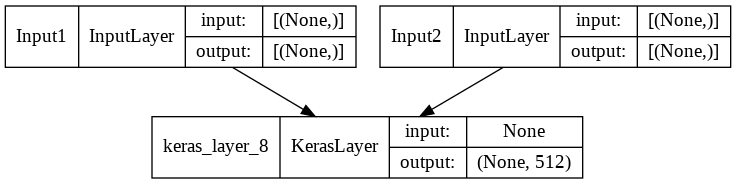

In [142]:
import tensorflow_hub as hub
import tensorflow as tf
embedding_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/5'

premises = tf.keras.layers.Input(shape=(), name="Input1", dtype=tf.string)
conclusion = tf.keras.layers.Input(shape=(), name="Input2", dtype=tf.string)
embedding_layer = hub.KerasLayer(embedding_url)
x1 = embedding_layer(premises)
x2 = embedding_layer(conclusion)

model = tf.keras.Model(inputs=[premises, conclusion], outputs=[x1, x2])
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [144]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280],
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
m.build([None, 224, 224, 3])  # Batch input shape.
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_9 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_5 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [145]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/10
15/15 [==============================] - 27s 1s/step - loss: 1.0233 - acc: 0.5929 - val_loss: 1.0513 - val_acc: 0.5678
Epoch 2/10
15/15 [==============================] - 25s 2s/step - loss: 0.8541 - acc: 0.6472 - val_loss: 0.9845 - val_acc: 0.6186
Epoch 3/10
15/15 [==============================] - 20s 1s/step - loss: 0.7630 - acc: 0.6848 - val_loss: 0.9651 - val_acc: 0.6017
Epoch 4/10
15/15 [==============================] - 20s 1s/step - loss: 0.6949 - acc: 0.7098 - val_loss: 0.9832 - val_acc: 0.5593
Epoch 5/10
15/15 [==============================] - 20s 1s/step - loss: 0.6576 - acc: 0.7307 - val_loss: 0.9455 - val_acc: 0.6356
Epoch 6/10
15/15 [==============================] - 19s 1s/step - loss: 0.5962 - acc: 0.7516 - val_loss: 0.9297 - val_acc: 0.6186
Epoch 7/10
15/15 [==============================] - 19s 1s/step - loss: 0.5591 - acc: 0.7808 - val_loss: 0.9276 - val_acc: 0.6695
Epoch 8/10
15/15 [==============================] - 20s 1s/step - loss: 0.5215 - acc: 0.80

In [146]:
covid_meme = "saved_models/covidmeme"
model.save(covid_meme) #save your model 

# to reload your model 
from tensorflow import keras
covidmeme_model = keras.models.load_model(covid_meme)

INFO:tensorflow:Assets written to: saved_models/covidmeme/assets


INFO:tensorflow:Assets written to: saved_models/covidmeme/assets


In [147]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [148]:
tf_model_predictions = covidmeme_model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Hero,Victim,Villian
0,0.2012714595,0.0414891466,0.7572393417
1,0.2638911307,0.0196367856,0.7164720297
2,0.0152073624,0.0172176622,0.9675749540
3,0.0449129082,0.2931789756,0.6619081497
4,0.0594438687,0.0488537550,0.8917023540


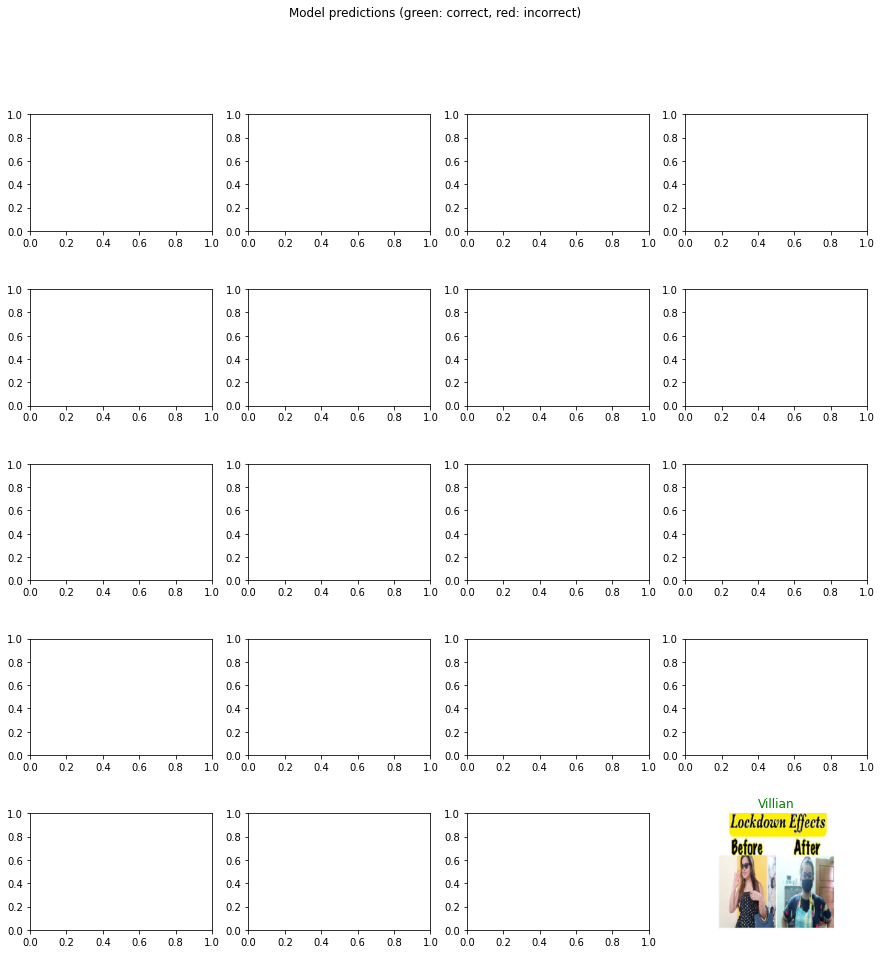

In [149]:
import matplotlib.pylab as plt
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)
for n in range(20): 
  plt.subplot(5,4,n+1)
plt.imshow(val_image_batch[n])
color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
plt.title(predicted_labels[n].title(), color=color)
plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")